In [3]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [4]:
data = pd.read_csv(r'C:\Users\blaman\Desktop\mqe\ml lab\TaylorRuleData.csv', index_col=0)

In [5]:
data.index = pd.to_datetime(data.index)

In [11]:
data.dropna(inplace=True)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [12]:
split1 = int(len(data)*0.6)
split2 = int(len(data)*0.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [13]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [14]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [15]:
model1 = sm.OLS(y_in,X_in).fit()

# 4.) Recreate the graph fro your model

In [16]:
import matplotlib.pyplot as plt

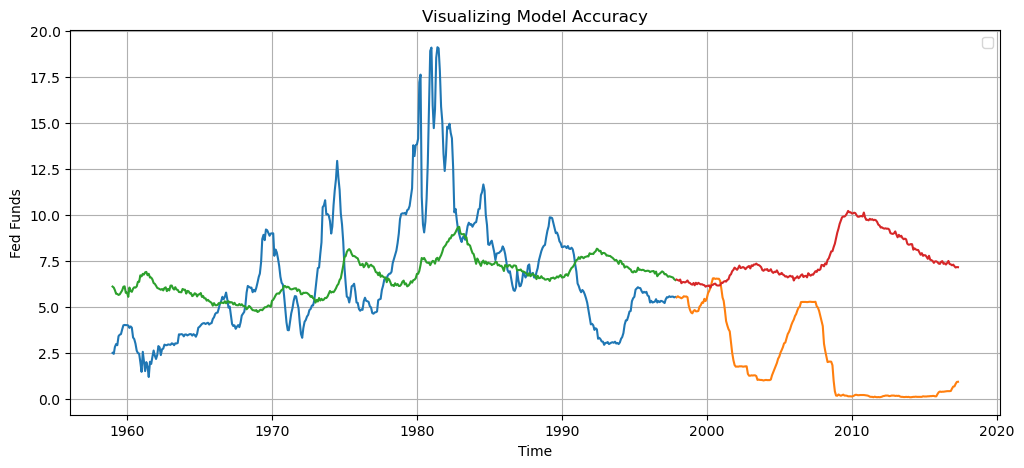

In [20]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [21]:
from sklearn.metrics import mean_squared_error

In [23]:
in_mse_1 = mean_squared_error(y_in,model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out,model1.predict(X_out))

In [24]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.07142201316864
Outsample MSE :  40.360827835668445


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
max_degrees=3

degrees: 1


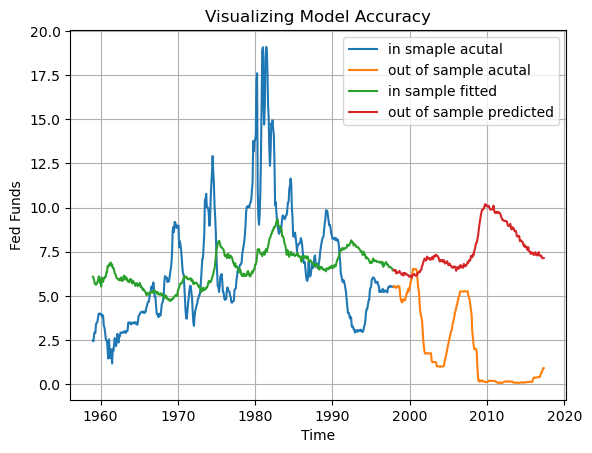

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566698
degrees: 2


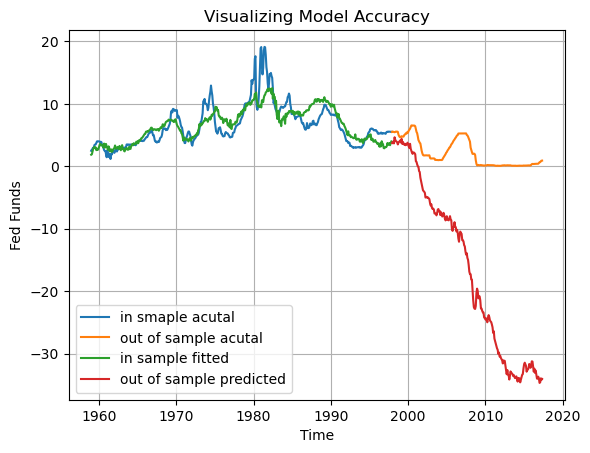

Insample MSE :  3.863477139276067
Outsample MSE :  481.446509903632
degrees: 3


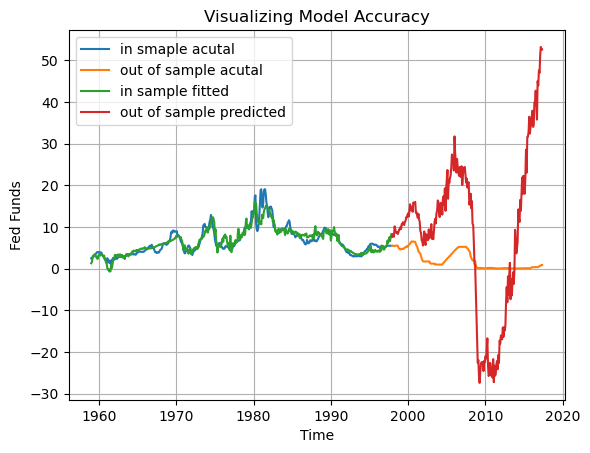

Insample MSE :  1.8723636271946136
Outsample MSE :  371.76618900618945


In [47]:
for degrees in range(1,1+max_degrees):
    print('degrees:',degrees)
    poly=PolynomialFeatures(degree=degrees)
    X_in_poly =poly.fit_transform(X_in)
    X_out_poly =poly.transform(X_out)
    #3
    model1 = sm.OLS(y_in,X_in_poly).fit()
    in_preds=model1.predict(X_in_poly)
    in_preds=pd.DataFrame(in_preds,index=y_in.index)   
    out_preds=model1.predict(X_out_poly)
    out_preds=pd.DataFrame(out_preds,index=y_out.index)   
    
    #4
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot( in_preds)
    plt.plot( out_preds)
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(['in smaple acutal','out of sample acutal','in sample fitted','out of sample predicted'])
    plt.grid()
    plt.show()
    
    #5
    in_mse_1 = mean_squared_error(y_in,model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out,model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

By comparing the graphs and mse numbers above, we can see that the number of outsample Mse increases a lot when polynomial degrees increases,though insample Mse decreases. So according to the result of outsample Mse of each model, we think the model with polynomial degrees = 1 is the best model to predict the value of y.